In [1]:
import numpy
import ndd
from scipy.stats import entropy
from numpy import random
random.seed(123)

In [2]:
def random_counts(n=None, k=None, a=None):
    pp = random.dirichlet([a]*k)
    return (pp, random.multinomial(n, pp))

In [3]:
def set_kwargs(k=None):
    d = {'NSB': {'k':k},
        'WW-0.0': {'k':k, 'a':0.0}, 
        'WW-0.01': {'k':k, 'a':0.01},
        'WW-0.1': {'k':k, 'a':0.1},
        'WW-1.0': {'k':k, 'a':1.0},
        'WW-10.0': {'k':k, 'a':10.0},
        'ML': {'k':k, 'dist':True},
        'pseudo-0.01': {'k':k, 'dist':True, 'a':0.01},
        'pseudo-0.1': {'k':k, 'dist':True, 'a':0.1},
        'pseudo-1.0': {'k':k, 'dist':True, 'a':1.0},
        'pseudo-10.0': {'k':k, 'dist':True, 'a':10.0}}
    return d

In [20]:
def compute_rmse(alpha_range, n, k, nrep, algorithms):
    rmse = {name:[] for name in algorithms}
    mean_entropy = []
    std_entropy = []
    for a in alpha_range:
        data = [random_counts(n=n, k=k, a=a) for rep in range(nrep)]
        pp_array, counts_array = zip(*data)
        true = numpy.array([entropy(pp) for pp in pp_array])
        mean_entropy.append(numpy.mean(true))
        std_entropy.append(numpy.std(true))
        for alg in algorithms:
            estimates = numpy.array([ndd.entropy(counts, **algorithms[alg]) for counts in counts_array])
            errors = estimates - true
            mu = numpy.mean(errors)
            rmse[alg].append(numpy.sqrt(numpy.mean(errors**2)))
    return (numpy.array(mean_entropy), numpy.array(std_entropy), rmse)

In [21]:
# these are the input parameters for http://www.nowozin.net/sebastian/blog/estimating-discrete-entropy-part-2.html
N = 100
K = 10000
alpha_range = numpy.logspace(-5, 1, 20)
nrep = 100

In [36]:
algs = set_kwargs(k=K)
mean_entropy, std_entropy, rmse = compute_rmse(alpha_range, N, K, nrep, algs)

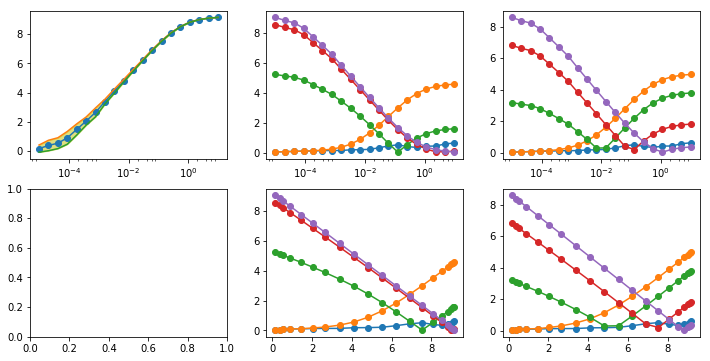

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2,3,figsize=(12,6))
e1 = mean_entropy + std_entropy
e2 = mean_entropy - std_entropy
axs[0,0].semilogx()
axs[0,1].semilogx()
axs[0,2].semilogx()
axs[0,0].plot(alpha_range, mean_entropy, '-o')
axs[0,0].plot(alpha_range, e1, '-')
axs[0,0].plot(alpha_range, e2, '-')
axs[0,0].fill_between(alpha_range, e1, e2, color='y', alpha=0.5)
for name in ['NSB', 'ML', 'pseudo-0.01','pseudo-0.1', 'pseudo-1.0']:
    axs[0,1].plot(alpha_range, rmse[name], '-o')
for name in ['NSB', 'WW-0.0', 'WW-0.01','WW-0.1', 'WW-1.0']:
    axs[0,2].plot(alpha_range, rmse[name], '-o')
for name in ['NSB', 'ML', 'pseudo-0.01','pseudo-0.1', 'pseudo-1.0']:
    axs[1,1].plot(mean_entropy, rmse[name], '-o')
for name in ['NSB', 'WW-0.0', 'WW-0.01','WW-0.1', 'WW-1.0']:
    axs[1,2].plot(mean_entropy, rmse[name], '-o')


In [153]:
def entropy_rmse(alpha_range, n, k, nrep, algorithms):
    rmse = {name:[] for name in algorithms}
    entropies = []
    for a in alpha_range:
        data = [random_counts(n=n, k=k, a=a) for rep in range(nrep)]
        pp_array, counts_array = zip(*data)
        true = numpy.array([entropy(pp) for pp in pp_array])
        entropies = numpy.append(entropies, true)
        for alg in algorithms:
            estimates = numpy.array([ndd.entropy(counts, **algorithms[alg]) for counts in counts_array])
            errors = estimates - true
            rmse[alg] = numpy.append(rmse[alg], numpy.sqrt(errors**2))
    return (entropies, rmse)

In [154]:
algs = set_kwargs(k=K)
entropies, rmse = entropy_rmse(alpha_range, N, K, nrep, algs)
print(len(entropies), len(rmse['NSB']))

2000 2000


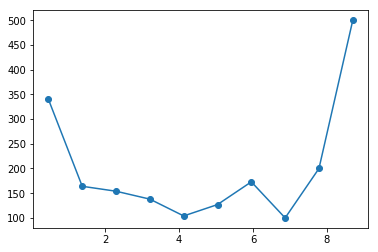

In [155]:
counts, bins = numpy.histogram(entropies)
nbins = len(counts)
inds = numpy.digitize(entropies, bins)
values = [0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)]
plt.plot(values, counts, '-o')

In [166]:
xs = []
ys = []
for b in range(nbins):
    xs.append(0.5*(bins[b]+bins[b+1]))
    
    ys.append(numpy.mean(rmse['NSB'][inds==b+1]))
ys = np.array(ys)
plt.plot(xs, ys/xs, '-o')
xs = []
ys = []
for b in range(nbins):
    xs.append(0.5*(bins[b]+bins[b+1]))
    ys.append(numpy.mean(rmse['pseudo-0.01'][inds==b+1]))
plt.plot(xs, ys/xs, '-o')

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [34]:
# these are the input parameters for http://www.nowozin.net/sebastian/blog/estimating-discrete-entropy-part-3.html
N = 100
K = 2000
alpha_range = numpy.linspace(0.25, 5, 100)
nrep = 500

In [35]:
algs = set_kwargs(k=K)
rmse = compute_rmse(alpha_range, N, K, nrep, algs)

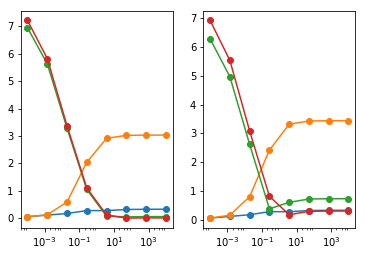

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.semilogx()
ax2.semilogx()
for name in ['NSB', 'ML', 'pseudo-0.5', 'pseudo-1.5']:
    ax1.plot(alpha_range, rmse[name], '-o')
for name in ['NSB', 'WW-0.0', 'WW-0.5', 'WW-1.5']:
    ax2.plot(alpha_range, rmse[name], '-o')


In [37]:
alpha_range = numpy.logspace(-4, 4, 8)
algs = set_kwargs(k=K)
rmse = compute_rmse(alpha_range, N, K, nrep, algs)